In [1]:
import os
import pandas as pd
import numpy as np

# raporttitiedostot luetaan    
def read_files(path):
    file_list = []
    
    for filename in os.listdir(path):
        if filename == ".DS_Store":
            continue
        data = pd.read_table(os.path.join(path, filename), sep=";", encoding='UTF-16')
        file_list.append(data) 
                
    return file_list

data = read_files("../data/")

In [2]:
# yhdistetään yhdeksi dataframeksi
df = pd.concat(data)
df.head()

,Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,1030,vt3_Vaasa_Mt,01.05.2020,1,11 HA-PA,74,50,17,18,16,...,294,341,328,294,267,221,185,123,104,87
1,1030,vt3_Vaasa_Mt,01.05.2020,1,12 KAIP,,1,1,,3,...,3,1,1,2,1,1,1,2,,1
2,1030,vt3_Vaasa_Mt,01.05.2020,1,13 Linja-autot,,,,,,...,1,,,,,,,,1,
3,1030,vt3_Vaasa_Mt,01.05.2020,1,14 KAPP,,1,,1,,...,1,,1,1,,,,1,1,1
4,1030,vt3_Vaasa_Mt,01.05.2020,1,15 KATP,5,1,6,4,5,...,2,1,4,2,3,2,4,1,2,2


In [3]:
# nimetään uudelleen sarakkeet, jotka eivät tulleet oikein
df = df.rename({" Mittauspiste Sijainti Päivä Suuntakoodi Ajoneuvoluokka":"Mittauspiste", \
                             "Unnamed: 1": "Sijainti", "Unnamed: 2": "Päivä", "Unnamed: 3": "Suuntakoodi", \
                             "Unnamed: 4": "Ajoneuvoluokka"}, axis=1)

# Lukumäärät numeroiksi objektin sijaan
df[[" KLO_00-01", " KLO_01-02", " KLO_02-03", " KLO_03-04", " KLO_04-05", " KLO_05-06", " KLO_06-07", \
    " KLO_07-08", " KLO_08-09", " KLO_09-10", " KLO_10-11", " KLO_11-12", " KLO_12-13", " KLO_13-14", \
    " KLO_14-15", " KLO_15-16", " KLO_16-17", " KLO_17-18", " KLO_18-19", " KLO_19-20", " KLO_20-21", \
    " KLO_21-22", " KLO_22-23", " KLO_23-00"]] = df[[" KLO_00-01", " KLO_01-02", " KLO_02-03", \
                                                     " KLO_03-04", " KLO_04-05", " KLO_05-06", " KLO_06-07", \
                                                     " KLO_07-08", " KLO_08-09", " KLO_09-10", " KLO_10-11", \
                                                     " KLO_11-12", " KLO_12-13", " KLO_13-14", " KLO_14-15", \
                                                     " KLO_15-16", " KLO_16-17", " KLO_17-18", " KLO_18-19", \
                                                     " KLO_19-20", " KLO_20-21", " KLO_21-22", " KLO_22-23", \
                                                     " KLO_23-00"]].apply(pd.to_numeric, errors='coerce')

# kellonajat kätevämpään muotoon
df = df.rename({" KLO_00-01":"00:00", " KLO_01-02":"01:00", " KLO_02-03":"02:00", " KLO_03-04":"03:00", \
                " KLO_04-05":"04:00", " KLO_05-06":"05:00", " KLO_06-07":"06:00", " KLO_07-08":"07:00", \
                " KLO_08-09":"08:00", " KLO_09-10":"09:00", " KLO_10-11":"10:00", " KLO_11-12":"11:00", \
                " KLO_12-13":"12:00", " KLO_13-14":"13:00", " KLO_14-15":"14:00", " KLO_15-16":"15:00", \
                " KLO_16-17":"16:00", " KLO_17-18":"17:00", " KLO_18-19":"18:00", " KLO_19-20":"19:00", \
                " KLO_20-21":"20:00", " KLO_21-22":"21:00", " KLO_22-23":"22:00", " KLO_23-00":"23:00"}, 
               axis=1)

# Korvataan puuttuvat arvot nollilla.
df.fillna(0, inplace = True)
df.shape

(43726, 29)

In [4]:
# Muutetaan päivämäärä-sarake päivämääräksi ja katsotaan eroja päiväkohtaisesti
df2 = df.copy().drop(['Sijainti', 'Ajoneuvoluokka', 'Suuntakoodi'], axis=1)
df2 = df2.melt(id_vars=['Päivä', 'Mittauspiste'], var_name='Hour', value_name='N')
df2['Aika'] = pd.to_datetime(df2.apply(lambda row: "{0} {1}".format(str(row['Päivä']), str(row['Hour'])), 
                                       axis=1), dayfirst=True, errors='coerce')
df2 = df2.drop(['Päivä', 'Hour'], axis=1)
df2 = df2.groupby([df2['Aika'], df2['Mittauspiste']]).sum()
print(df2.head(30))

                                       N
Aika                Mittauspiste        
2020-01-01 00:00:00 9             1354.0
                    117           1330.0
                    149           1918.0
                    198            298.0
                    205            718.0
                    225             16.0
                    235            858.0
                    248            186.0
                    438           1404.0
                    453            538.0
                    573            230.0
                    633            384.0
                    733            448.0
                    937             18.0
                    1030           714.0
                    1256           408.0
                    1301            60.0
                    1431          1138.0
                    1434             4.0
                    1441           402.0
                    1458           224.0
2020-01-01 01:00:00 9             1450.0
                

In [5]:
df3 = df2.reset_index()
df3 = df3.pivot(index='Aika', columns='Mittauspiste', values='N')
df3['Sum'] = df3.sum(axis=1)
df3.head()

Mittauspiste,9,117,149,198,205,225,235,248,438,453,...,733,937,1030,1256,1301,1431,1434,1441,1458,Sum
Aika,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1354.0,1330.0,1918.0,298.0,718.0,16.0,858.0,186.0,1404.0,538.0,...,448.0,18.0,714.0,408.0,60.0,1138.0,4.0,402.0,224.0,12650.0
2020-01-01 01:00:00,1450.0,1312.0,2356.0,356.0,602.0,22.0,588.0,188.0,1284.0,432.0,...,352.0,36.0,502.0,404.0,58.0,696.0,10.0,374.0,188.0,11666.0
2020-01-01 02:00:00,1042.0,1022.0,1704.0,236.0,502.0,4.0,484.0,202.0,1146.0,444.0,...,268.0,22.0,294.0,330.0,60.0,218.0,10.0,172.0,88.0,8620.0
2020-01-01 03:00:00,822.0,794.0,1390.0,172.0,338.0,4.0,376.0,102.0,818.0,322.0,...,228.0,2.0,262.0,300.0,40.0,154.0,4.0,98.0,112.0,6654.0
2020-01-01 04:00:00,784.0,646.0,1144.0,184.0,304.0,8.0,280.0,80.0,800.0,314.0,...,196.0,8.0,164.0,248.0,40.0,126.0,2.0,120.0,90.0,5784.0


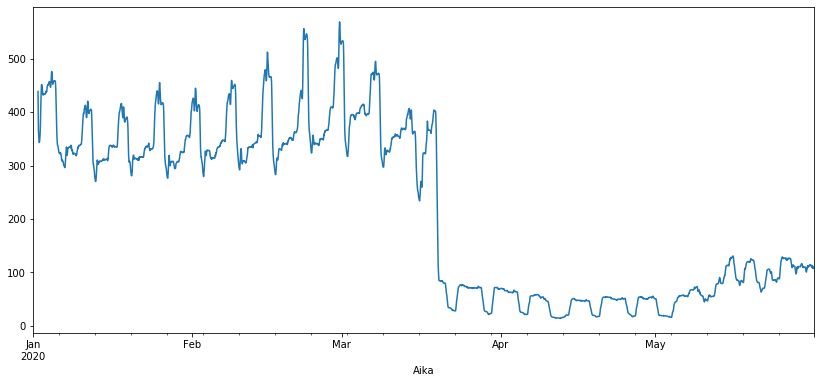

In [8]:
import matplotlib.pyplot as plt
df3[1431].rolling(24).mean().plot(label='liukuva_keskiarvo', figsize=(14, 6))
plt.savefig('rolling_1431.jpg')

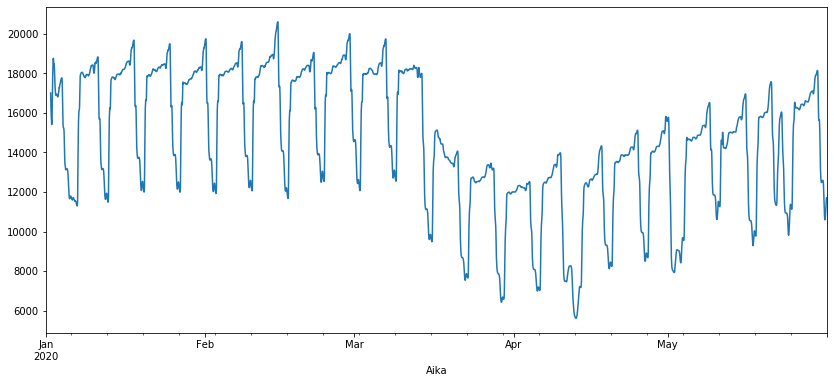

In [9]:
df3['Sum'].rolling(24).mean().plot(label='liukuva_keskiarvo', figsize=(14, 6))
plt.savefig('rolling_sum.jpg')

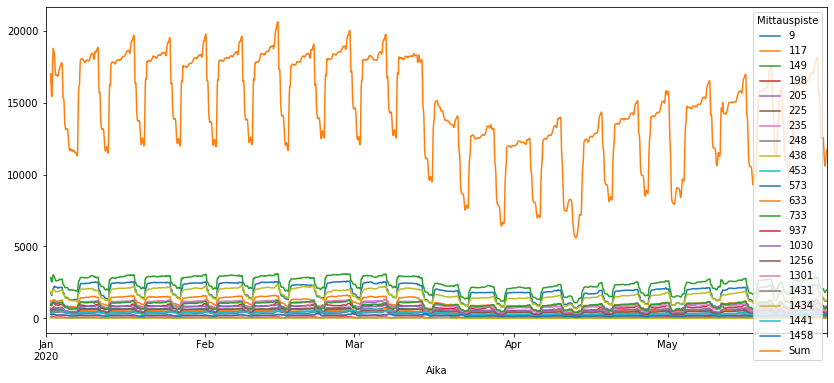

In [9]:
df3.rolling(24).mean().plot(label='liukuva_keskiarvo', figsize=(14, 6))

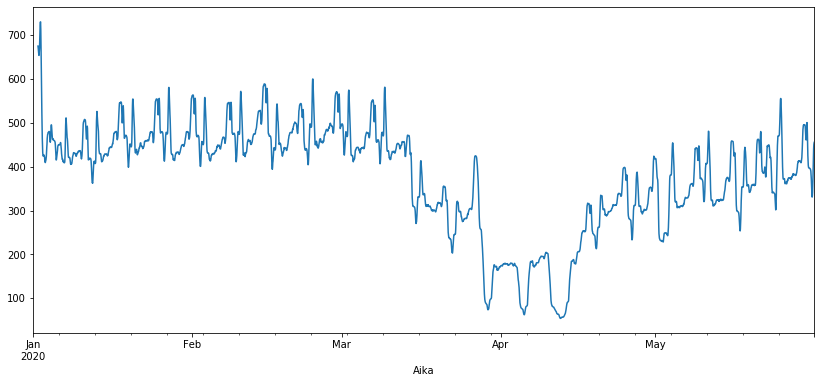

In [10]:
df3[248].rolling(24).mean().plot(label='liukuva_keskiarvo', figsize=(14, 6))
plt.savefig('rolling_248.jpg')

In [13]:
df3.to_csv('lam_data.csv', encoding='utf-8')